In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import os
import pickle
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = r'C:\Users\user\weatherAUS.csv'
df = pd.read_csv(data)

Sampel Data:
          X    Y
0  3.745401  0.0
1  9.507143  1.0
2  7.319939  1.0
3  5.986585  1.0
4  1.560186  0.0

Hasil Training Model:
Intercept (b0): -11.10
Koefisien (b1): 2.27

Evaluasi Model:
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



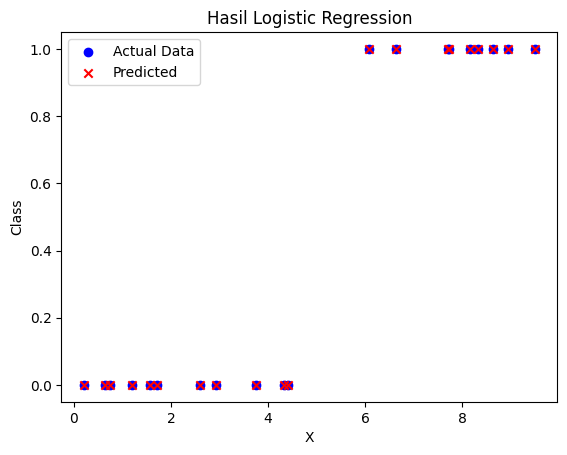

Model berhasil disimpan sebagai 'logistic_model.pkl'


In [4]:
# 1. Buat dataset sederhana
np.random.seed(42)
X = np.random.rand(100, 1) * 10
Y = (X > 5).astype(int).ravel()

# Tampilkan beberapa data
print("Sampel Data:")
print(pd.DataFrame(np.hstack((X, Y.reshape(-1, 1))), columns=["X", "Y"]).head())

# 2. Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. Model Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

# 4. Hasil model
print("\nHasil Training Model:")
print(f"Intercept (b0): {model.intercept_[0]:.2f}")
print(f"Koefisien (b1): {model.coef_[0][0]:.2f}")

# 5. Prediksi
Y_pred = model.predict(X_test)

# 6. Evaluasi
accuracy = accuracy_score(Y_test, Y_pred)
print("\nEvaluasi Model:")
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(Y_test, Y_pred))

# 7. Visualisasi
plt.scatter(X_test, Y_test, color="blue", label="Actual Data")
plt.scatter(X_test, Y_pred, color="red", marker="x", label="Predicted")
plt.xlabel("X")
plt.ylabel("Class")
plt.legend()
plt.title("Hasil Logistic Regression")
plt.show()

# 8. Simpan model
os.makedirs("models", exist_ok=True)
with open("models/logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model berhasil disimpan sebagai 'logistic_model.pkl'")